
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

Si deseamos clasificar algún tipo de imagen, resultado en campos medicos, astrofisicos se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios basicos de  regresión logística para aplicarla a los  modelos de clasificación.

Supongamos que queremos clasificar dos tipos, basado en dos características:



In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np

make_classification genera un problema de clasificación aleatorio de n clases.

Text(0, 0.5, 'X_2')

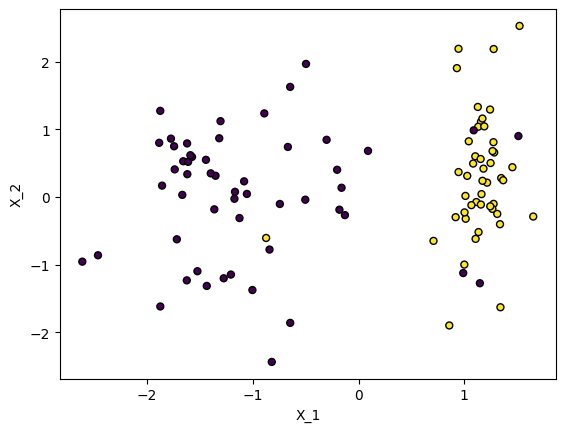

In [2]:
X1, Y1 = make_classification( n_samples=100,
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

En este caso cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de y dado un x parametrizado por $\theta$, $P(y|x;\theta)$, asi :

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

Si tenemos muestra equiprobables, podemos definir lo siguiente  para P :

- $P<0.5$ se obtienen los objetos tipo 0
- $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de los  sistemas basado en las probabilidades a partir de un clasificador logístico:


\begin{equation}
f(z)=\frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



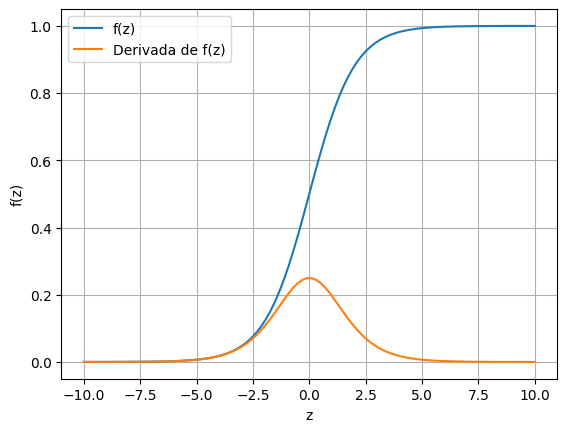

In [3]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z = np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$
- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

#### ¿Cual es la probabilidad de que dado un hyperplano, los valores de un hyperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logistica, a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, así:


\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hyperplano  $\Theta^T X\geq 0.0$, $y = 1$
- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de desicion entre los datos a clasificar. Para los datos dados arriba, se puede establecer el siguiente clasificador.


$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algun metodo encontramos que los parametros $\Theta$ entonces podemos definir la frontera de clasifiación. Como ejemplo supongamos que encontramos los siguientes parametros $\Theta=[3.0, -20, 1.0]$

Ecnontrar la ecuacion de la recta y mejorar la parametrizacion

$3-20x1+x2=0$

$x_2= 20 x_1 - 3$

In [4]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1 - 3

Text(0, 0.5, 'X_2')

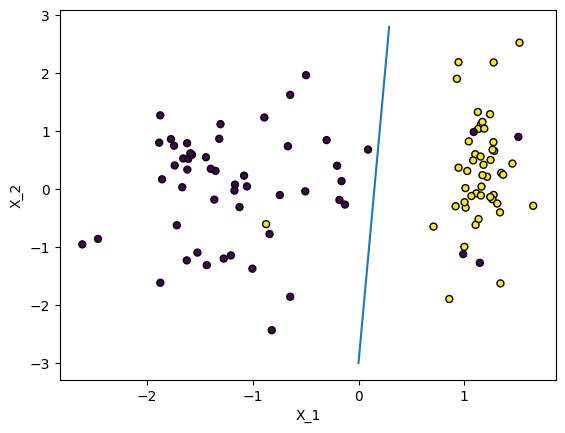

In [5]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

Las Fronteras no lineales también puede ser consideradas, para ello se puede definir  $\Theta^T X$ como funcion de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de desición en este caso esta determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de y = 1.

Para este mismo caso, supongamos que tenmos la siguiente distribución de datos, ¿Cuál es el mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes:







(-1.12244940477901, 1.1839643638442499, -1.2696420440360447, 1.185918477713659)

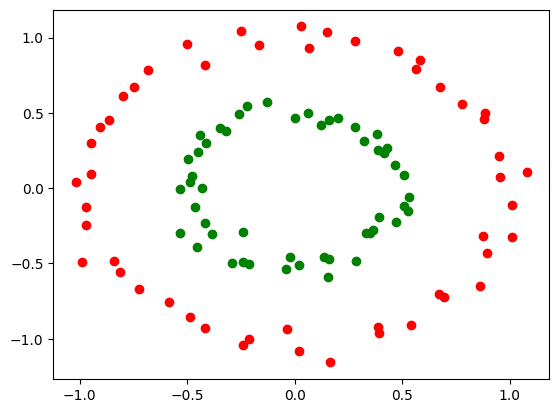

In [6]:
#Make a large circle containing a smaller circle in 2d.
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)

red = y == 0
green = y == 1

f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en (0, 0) y radio de 0.7 aproxidamente,  asi nuestra elección de parámetros para el polinomio ejemplicado en la celda anterior ($\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$ ) es:


$\Theta^T = [0.7,0, 0, 1,1 ] $

Reemplando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

Text(0, 0.5, 'X_2')

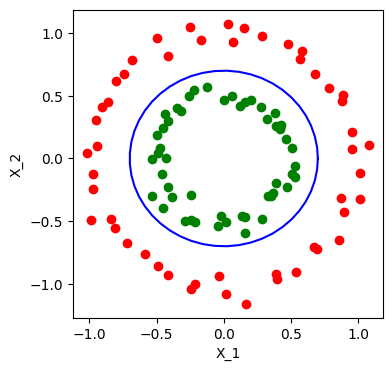

In [7]:
#Por motivos graficos convirtamos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

De forma general, ¿Cómo pueden ser elegidos los valores de $\Theta$?.

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



Para ello, podemos definir la función de coste como :

$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

Esta función de coste permite establecer el mejor clasificadOR para la regresión logistica de acuerdo a la teroria de probabilidad. Se garantiza que cuando $P(y=1|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$, analogamente, cuando $P(y=0|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.
La metrica empleada para la regresión lineal no es recomedada en este caso, dado que la funcion de coste puede presentar múltiples minimos que dificultan la minimizacion  a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada mas adelante segun la teoria de la probabilidad.

Se deja como tarea motrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$
- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste asi,  nuestro algoritmo de minimizacion permite encontrar los valores de $\theta$ despues de un conjunto determinado de itereaciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


Otros metodos de minizacion podrian ser aplicados, tales como:


[Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


[L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

[Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


# Interpretación estadística


¿Qué tan adeacuado es la elección de $J(\theta)$  para el modelo de regresion logistica?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}



\begin{equation}
P(y|x;\theta)=[h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)=\prod_{i=1}^{m} [h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)(1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los mas probables es decir que para encontrar los valores de $\theta$ que nos garantizan la maxima probabilidad es necesario maximar la función anterior. Despues de realizar los calculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$




In [8]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt

In [9]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
X = iris["data"]
Y = iris["target"]

In [13]:
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

In [15]:
df.columns=cols
df["Target"]=Y

In [16]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [17]:
df_train = strat_test_set
df_test = strat_train_set

#Clasificación tipo 1: setosa

In [18]:
# Seleccion de valores de y
# Tomemos solo una caracteristica por motivos didacticos
y_train = (df_train['Target'] == 0)#.astype(np.float)
X_train = df_train.iloc[:,0:1].values

y_test = (df_test['Target'] == 0)#.astype(np.float)
X_test = df_test.iloc[:,0:1].values

# Regresión logisitica
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.8
0.9166666666666666


In [19]:
# Determinacion de la frontera

# Generamos los valores de X_new, esto se hace para generar una nueva muestra
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)
prob = log_reg.predict_proba(X_new)      # Entrega la probabilidad para cada valor

prob[0]

array([1.63091762e-12, 1.00000000e+00])

In [20]:
# Toma los valores cuya probabilidad es mayor de 0.5

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([5.33533534])

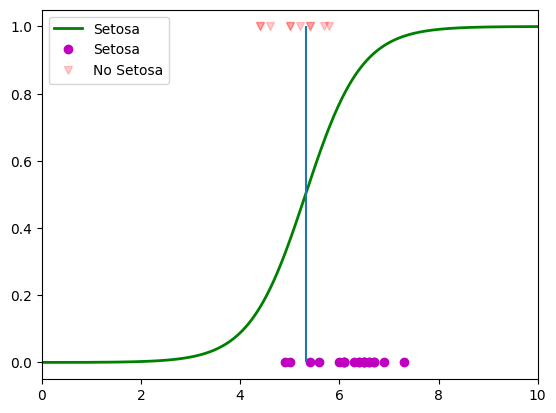

In [21]:
#Regresion Logistica
plt.plot(X_new, prob[:, 0], "g-", linewidth=2, label="Setosa")
# Frontera de desicion
plt.plot(X_train[y_train==0], y_train[y_train==0],"mo", label="Setosa")
plt.plot(X_train[y_train!=0], y_train[y_train!=0],"rv",alpha=0.2,label="No Setosa")
plt.xlim(0.0, 10)
plt.legend()
plt.vlines(decision_boundary, 0,1)
plt.show()

# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




Para este caso, ahora, para los datos de entrenamiento, se tomarán todas las características (no sólo los "Targets"). Estas características son: SepalLength_cm,	SepalWidth_cm,	PetalLength_cm y PetalWidth_cm. Por esto, se debe cambiar el parametro multi_class de la función.

'In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)'

Se usará la opción 'multinomial'.

In [22]:
df.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.mean()

,0
SepalLength_cm,5.843333
SepalWidth_cm,3.057333
PetalLength_cm,3.758000
PetalWidth_cm,1.199333
Target,1.000000


In [24]:
# Tomamos todas las características para entrenar el modelo
X_train2 = df_train[['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm']].values
y_train2 = df_train['Target'].values

X_test2 = df_test[['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm']].values
y_test2 = df_test['Target'].values

# Entrenamos un modelo de regresión logística multinomial
log_reg2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg2.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [25]:
# Evaluamos el modelo
print("Puntaje para el conjunto de entrenamiento:", log_reg2.score(X_train2, y_train2))
print("Puntaje para el conjunto de prueba:", log_reg2.score(X_test2, y_test2))

Puntaje para el conjunto de entrenamiento: 0.9666666666666667
Puntaje para el conjunto de prueba: 0.9583333333333334


In [26]:
# Definir una nueva muestra para predecir
X_new2 = np.array([[4.9, 5.0, 1.8, 0.3]])

# Obtener las probabilidades para cada clase
prob2 = log_reg2.predict_proba(X_new2)

# Imprimir las probabilidades para cada clase
for i, prob in enumerate(prob2[0]):
    print(f"Probabilidad de clase {i}:", prob)

# Predicción de la clase más probable
clase = log_reg2.predict(X_new2)
clases = ['Setosa', 'Versicolor', 'Virginica']
print(f"\nLa clase más probable para la muestra {X_new2[0]} es: {clases[clase[0]]}")

Probabilidad de clase 0: 0.9724073910073083
Probabilidad de clase 1: 0.02754275996142309
Probabilidad de clase 2: 4.984903126858122e-05

La clase más probable para la muestra [4.9 5.  1.8 0.3] es: Setosa


Ahora, lo probaré ingresando los valores promedio para cada característica:

[5.84, 3.057333, 3.758000, 1.199333]

In [27]:
mean_c = np.array([[5.84, 3.057333, 3.758000, 1.199333]])

# Obtener las probabilidades para cada clase
prob_mean = log_reg2.predict_proba(mean_c)

# Imprimir las probabilidades para cada clase
for i, prob in enumerate(prob_mean[0]):
    print(f"Probabilidad de clase {i}:", prob)

# Predicción de la clase más probable
clase_mean = log_reg2.predict(mean_c)
print(f"\nLa clase más probable para la muestra {mean_c[0]} es: {clases[clase_mean[0]]}")

Probabilidad de clase 0: 0.13441400533149248
Probabilidad de clase 1: 0.7929314286132284
Probabilidad de clase 2: 0.07265456605527926

La clase más probable para la muestra [5.84     3.057333 3.758    1.199333] es: Versicolor


# SOFTMAX REGRESION

La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

In [28]:
# Para todas las clases se puede realizar facilmente a traves de
# lo siguiente

y_train = df_train['Target']
X_train = df_train.iloc[:,0:1].values

y_test = df_test['Target']
X_test = df_test.iloc[:,0:1].values

In [29]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", \
                                 C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [30]:
X_new = np.linspace(0, 10, 1).reshape(-1,1)
softmax_reg.predict_proba(X_new)

#Probabilidad de pertencer a la clase cero

array([[9.99996616e-01, 3.38435473e-06, 1.51953175e-11]])

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas


Esto fue lo que se hizo anteriormente en la Tarea 8.1. Se usaron 4 de las características presentadas en los datos de Iris para hacer el entrenamiento y hallar las probabilidades.

#### 2. Analizar que pasa con la regularaización.


La regularización ayuda a prevenir el sobreajuste y puede ajustar la complejidad del modelo. Para este análisis, podemos variar el parámetro C de LogisticRegression, que controla la regularización. Este parámetro es inverso a la regularización por lo que un valor pequeño de C implica una regularización más fuerte.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

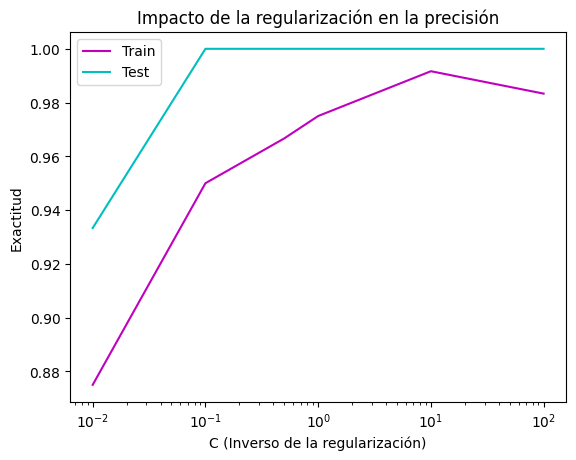

In [31]:
from sklearn.model_selection import train_test_split

# Tomando todas las características del Dataframe
X = df[['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm']].values
y = df['Target'].values

# Dividir los datos en conjuntos de entrenamiento y prueba.
# Aunque ya estaba hecho en el ejemplo, elegí volver a hacerlo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tomar diferentes valores de C para probar
Cs = [0.01, 0.1, 0.5, 1, 10, 100]

train_exac = []
test_exac = []

for C in Cs:
    log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=C)
    log_reg.fit(X_train, y_train)

    # Mirar qué tan bueno es el ajuste a los 2 grupos de datos
    train_score = log_reg.score(X_train, y_train)
    test_score = log_reg.score(X_test, y_test)

    train_exac.append(train_score)
    test_exac.append(test_score)

# Visualizar el impacto de la regularización en el rendimiento
plt.plot(Cs, train_exac, 'm', label="Train")
plt.plot(Cs, test_exac, 'c', label="Test")
plt.xscale('log')
plt.xlabel("C (Inverso de la regularización)")
plt.ylabel("Exactitud")
plt.legend()
plt.title("Impacto de la regularización en la precisión")
plt.show()

#### 3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos


Existen diferentes métricas para evaluar el rendimiento del modelo de clasificación usado, en este caso, LogisticRegression. Para analizar las métricas se hará la predicción de los y_test dado los inputs de entrenamiento y se probarán estos resultados con algunos de las principales métricas.

**accuracy_score** Mide el porcentaje de predicciones correctas entre todas las predicciones. Ideal para conjuntos de datos equilibrados.

**presicion_score** Indica la proporción de verdaderos positivos entre todos los elementos predichos como positivos.

**recall_socre** Recall es la relación donde es el número de verdaderos positivos y el número de falsos negativos. Recall es la capacidad del clasificador para encontrar todas las muestras positivas. El mejor valor es 1 y el peor valor es 0.

**confusion_matrix** By definition a confusion matrix is such that C is equal to the number of observations known to be in group and predicted to be in group $C_{ij}$.



Valores obtenidos: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Valores reales:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


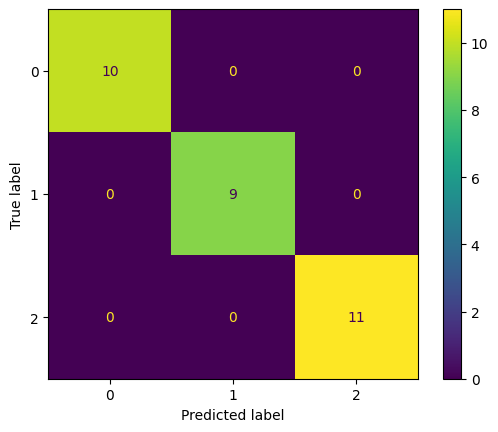

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(solver='newton-cg', C=C)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)   # Datos de salida predichos

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
con = confusion_matrix(y_test, y_pred)

print("Valores obtenidos:", y_pred)
print("Valores reales:   ", y_test)
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
ConfusionMatrixDisplay(confusion_matrix=con).plot()

Las curvas de aprendizaje permiten ver cómo se comporta el modelo a medida que se incrementa la cantidad de datos de entrenamiento. Esto ayuda a detectar si el modelo sufre de sobreajuste o subajuste.

Si ambas curvas se estabilizan en un punto alto, el modelo está generalizando bien. Si hay una gran brecha entre entrenamiento y validación, hay sobreajuste; si ambas curvas son bajas, hay subajuste.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 c

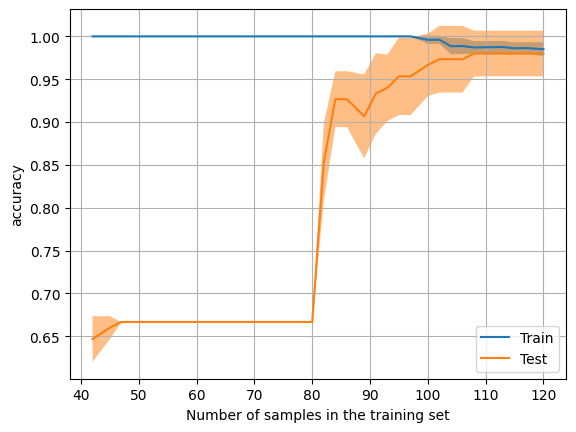

In [33]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 50), random_state=42)

LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores,
    score_name="accuracy").plot()

plt.grid()

#### 4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), construir las fronteras de desición para este multiclasificador.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-65-42a36130af3d>:20: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(x0, x1, y_sepal_pred, color=['red', 'limegreen', 'blue'],


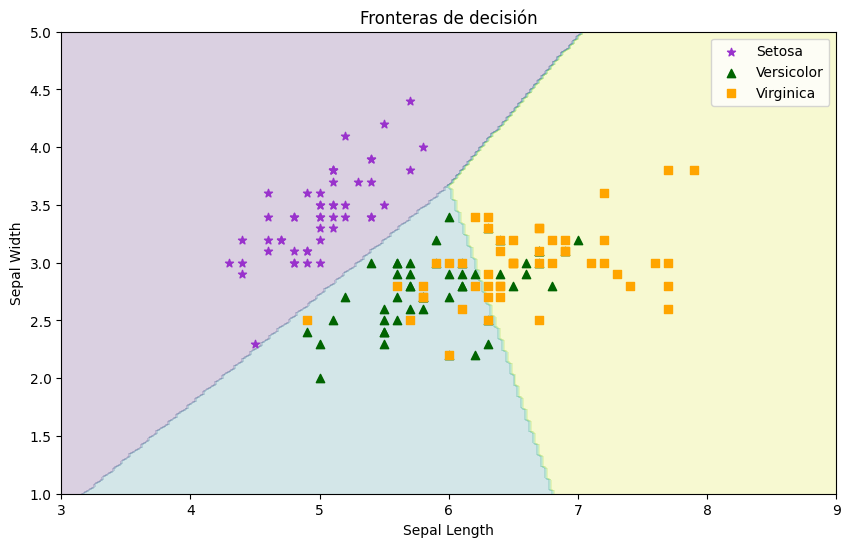

In [65]:
X_sepal = df[['SepalLength_cm', 'SepalWidth_cm']].values
y_sepal = df['Target'].values

# Entrenar el modelo en las dos características seleccionadas
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_sepal, y_sepal)

# Crear una malla para graficar las fronteras de decisión dada las
# 2 variables
x0, x1 = np.meshgrid(np.linspace(3, 9, 200), np.linspace(1, 5, 200))
X_new_sepal = np.c_[x0.ravel(), x1.ravel()]

# Predecir en la malla dados los nuevos valores de X
y_sepal_pred = softmax_reg.predict(X_new_sepal)
y_sepal_pred = y_sepal_pred.reshape(x1.shape)

# Gráfico
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_sepal_pred, color=['red', 'limegreen', 'blue'],
             alpha=0.2)
plt.scatter(X_sepal[:, 0][y_sepal == 0], X_sepal[:, 1][y_sepal == 0],
            color="darkorchid", marker="*", label="Setosa")
plt.scatter(X_sepal[:, 0][y_sepal == 1], X_sepal[:, 1][y_sepal == 1],
            color="darkgreen", marker='^', label="Versicolor")
plt.scatter(X_sepal[:, 0][y_sepal == 2], X_sepal[:, 1][y_sepal == 2],
            color="orange", marker='s', label="Virginica")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("Fronteras de decisión")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-71-567a04a211ad>:21: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(x0, x1, y_sepal_pred, color=['red', 'limegreen', 'blue'],


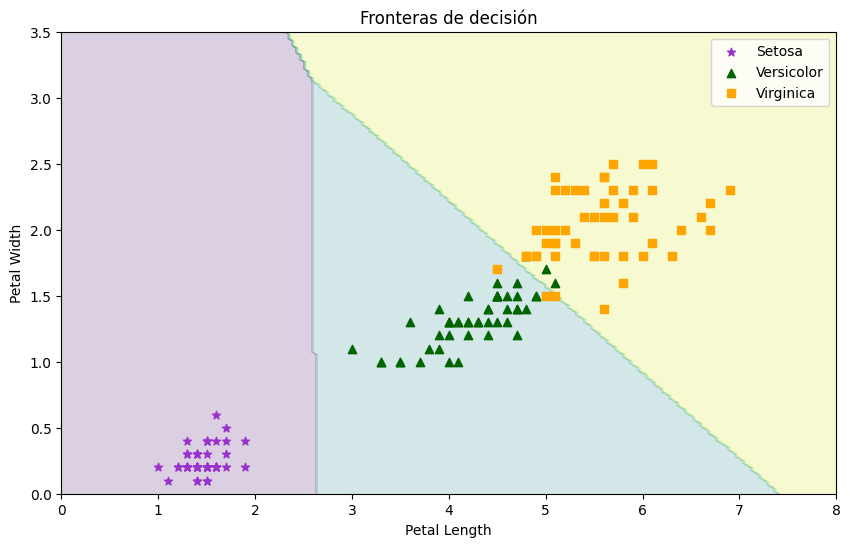

In [71]:
# Selección de dos características para una visualización en 2D
X_sepal = df[['PetalLength_cm', 'PetalWidth_cm']].values
y_sepal = df['Target'].values

# Entrenar el modelo en las dos características seleccionadas
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_sepal, y_sepal)

# Crear una malla para graficar las fronteras de decisión dada las
# 2 variables
x0, x1 = np.meshgrid(np.linspace(0, 8, 200), np.linspace(0, 3.5, 200))
X_new_sepal = np.c_[x0.ravel(), x1.ravel()]

# Predecir en la malla dados los nuevos valores de X
y_sepal_pred = softmax_reg.predict(X_new_sepal)
y_sepal_pred = y_sepal_pred.reshape(x1.shape)

# Gráfico
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_sepal_pred, color=['red', 'limegreen', 'blue'],
             alpha=0.2)
plt.scatter(X_sepal[:, 0][y_sepal == 0], X_sepal[:, 1][y_sepal == 0],
            color="darkorchid", marker="*", label="Setosa")
plt.scatter(X_sepal[:, 0][y_sepal == 1], X_sepal[:, 1][y_sepal == 1],
            color="darkgreen", marker='^', label="Versicolor")
plt.scatter(X_sepal[:, 0][y_sepal == 2], X_sepal[:, 1][y_sepal == 2],
            color="orange", marker='s', label="Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Fronteras de decisión")
plt.show()


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html